In [22]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor

In [23]:
train_data = datasets.FashionMNIST(
    root='data', 
    train=True,
    download=True,
    transform=ToTensor()
)

In [24]:
test_data = datasets.FashionMNIST(
    root='data', 
    train=False,
    download=True,
    transform=ToTensor()
)

In [25]:
batch_size = 64
train_load = DataLoader(train_data, batch_size=batch_size)
test_load = DataLoader(test_data, batch_size=batch_size)
for X, y in test_load:
    print(f'shape of X [N, C, H, W]: {X.shape}') #batch size, channels, height, width
    print(f'shape of y: {y.shape} {y.dtype}')
    break

shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64]) torch.int64


In [26]:
# getting GPU or MPS
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)

print(f'using {device} device')

using cuda device


In [27]:
# model creation 
class NeuRalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.falttern = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def foreward(self, x):
        x = self.flattern(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuRalNet().to(device)
print(model)

NeuRalNet(
  (falttern): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [28]:
#optimize the model parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [29]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # predicted error
        pred = model(X)
        loss = loss_fn(pred, y)
        #bck propagation 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

### GODDAM BASICS OF PYTORCH 

In [30]:
import numpy as np
import math

In [31]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [32]:
a = np.random.rand()
b = np.random.rand()
c = np.random.rand()
d = np.random.rand()

learn_rate = 1e-6
for t in range(200):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)
    # backproportion
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum() 
    grad_d = (grad_y_pred * x ** 3).sum()

    #update weights
    a -= learn_rate * grad_a
    b -= learn_rate * grad_b
    c -= learn_rate * grad_c
    d -= learn_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 160.8723585379812
199 109.9487271532796
Result: y = 0.09999396456084844 + 0.5615606366403609 x + -0.01725060290563039 x^2 + -0.05134357512729707 x^3


### NUMPY --> TENSOR 

In [33]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [34]:
import torch
import math
dtype = torch.float
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_default_device(device)

#random data generation
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

In [35]:
# random teors with weight, requires_grad=True compute gradients wrttensors while bckpass
a = torch.rand((), dtype=dtype, requires_grad=True)
b = torch.rand((), dtype=dtype, requires_grad=True)
c = torch.rand((), dtype=dtype, requires_grad=True)
d = torch.rand((), dtype=dtype, requires_grad=True)

learn_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    #loss, in tensor sahpe of (1,)
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    loss.backward()
    with torch.no_grad():
        a -= learn_rate * a.grad
        b -= learn_rate * b.grad
        c -= learn_rate * c.grad
        d -= learn_rate * d.grad

        #manually 0 the grads after updating the gradients
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')   

99 593.2322998046875
199 402.7572021484375
299 274.615478515625
399 188.33071899414062
499 130.17735290527344
599 90.94671630859375
699 64.45582580566406
799 46.5496826171875
899 34.43402099609375
999 26.227813720703125
1099 20.663658142089844
1199 16.8867244720459
1299 14.320234298706055
1399 12.574305534362793
1499 11.385252952575684
1599 10.574528694152832
1699 10.021114349365234
1799 9.642926216125488
1899 9.38417911529541
1999 9.206937789916992
Result: y = 0.015927763655781746 + 0.8443171977996826 x + -0.0027478039264678955 x^2 + -0.09156323224306107 x^3


In [36]:
#autograd-> essential for training NN through bk propogation
import torch
import math

In [37]:
class PolyNomial(torch.autograd.Function):# used for foreward and bkward 
    @staticmethod
    def forward(ctx, input): #ctx used to save the info for bkward pass.
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)
    @staticmethod   
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

dtype = torch.float
device = torch.device('cuda:0')
#generating some random data with requires_grad =False no requirement for computing the gradient.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

#4weights - y = a + b * P3(c+d*x), requires_grad = True for backward pass

a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learn_rate = 5e-6
for t in range(2000):
    P3 = PolyNomial.apply
    y_pred = a + b * P3(c + d * x)
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    loss.backward()
# updating wts using gradient descent 
    with torch.no_grad():
        a -= learn_rate * a.grad
        b -= learn_rate * b.grad
        c -= learn_rate * c.grad
        d -= learn_rate * d.grad
# manually zero gradeints afther wts update
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03520202636719
499 50.978511810302734
599 37.40313720703125
699 28.20686912536621
799 21.973186492919922
899 17.745729446411133
999 14.877889633178711
1099 12.931766510009766
1199 11.610918998718262
1299 10.714248657226562
1399 10.105475425720215
1499 9.692106246948242
1599 9.411375045776367
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.94364070892334
Result: y = 1.2777713782885503e-11 + -2.208526849746704 * P3(-2.5764071431844116e-10 + 0.2554861009120941 x)


### DEFINING NN IN pYTORCH

In [38]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

my_nn = Net()
print(my_nn)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### done with defining a NN, now working on Fnn

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.50)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        output = F.log_softmax(x, dim = 1)
        return output

In [41]:
random_data = torch.rand((1,1,28,28))
my_nn = Net()
result = my_nn(random_data)
print(result)

tensor([[-2.2110, -2.3916, -2.2616, -2.3956, -2.3657, -2.1745, -2.2660, -2.4530,
         -2.2333, -2.3112]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)


In [42]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [43]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root ='data',
    train = False,
    download = True,
    transform = ToTensor(),
)

In [44]:
batch_size = 64
train_dataloader = DataLoader(train_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f'shape of X[N, C, H, W]: {X.shape}')
    print(f'shape of y:{y.shape} {y.dtype}')
    break

shape of X[N, C, H, W]: torch.Size([64, 1, 28, 28])
shape of y:torch.Size([64]) torch.int64


### MODEL CREATION 

In [62]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cup'
)
print(f'using {device} device')

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits 

model = NN().to(device)
print(model)
        

using cuda device
NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### OPTIMIZING MODEL PARAMS

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [67]:
def train(dataloder, model, loss_fn, optimizer):
    size = len(dataloder.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloder):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        #back propagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # clears old gradinets attributes

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f'loss : {loss:>7f} [{current :>5d}/{size:>5d}]')

In [68]:
def test(dataloder, model, loss_fn):
    size = len(dataloder.dataset)
    num_batches = len(dataloder)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloder:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f'Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss:{test_loss:>8f} \n')

In [70]:
epochs = 10
for t in range(epochs):
    print(f'Epochs {t+1}\n---------------------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print('Done!')

Epochs 1
---------------------------------
loss : 2.169889 [   64/60000]
loss : 2.157340 [ 6464/60000]
loss : 2.106183 [12864/60000]
loss : 2.125902 [19264/60000]
loss : 2.076747 [25664/60000]
loss : 2.022717 [32064/60000]
loss : 2.056694 [38464/60000]
loss : 1.976704 [44864/60000]
loss : 1.978339 [51264/60000]
loss : 1.926713 [57664/60000]
Test Error: 
 Accuracy: 61.9%, Avg loss:1.910881 

Epochs 2
---------------------------------
loss : 1.938921 [   64/60000]
loss : 1.913142 [ 6464/60000]
loss : 1.797389 [12864/60000]
loss : 1.834766 [19264/60000]
loss : 1.740319 [25664/60000]
loss : 1.686286 [32064/60000]
loss : 1.707291 [38464/60000]
loss : 1.605227 [44864/60000]
loss : 1.620594 [51264/60000]
loss : 1.527028 [57664/60000]
Test Error: 
 Accuracy: 63.1%, Avg loss:1.536796 

Epochs 3
---------------------------------
loss : 1.600127 [   64/60000]
loss : 1.568912 [ 6464/60000]
loss : 1.413239 [12864/60000]
loss : 1.481189 [19264/60000]
loss : 1.366932 [25664/60000]
loss : 1.359573 [32

### SAVING THE MODEL

In [71]:
torch.save(model.state_dict(), 'model.pth')
print('saved Pytorch model status to model.pth')

saved Pytorch model status to model.pth


### LOADING THE MODEL

In [73]:
model = NN().to(device)
model.load_state_dict(torch.load('model.pth', weights_only=True))

<All keys matched successfully>

In [74]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", actual: "{actual}"')


Predicted: "Ankle boot", actual: "Ankle boot"


# TENSORS

In [1]:
import torch
import numpy as np

In [2]:
dt = [[1,2], [3,4]]
x_dt = torch.tensor(dt)

In [3]:
#tensors can be created from numpy arrays
np_array = np.array(dt)
x_np = torch.from_numpy(np_array)

# LIST vs NUMPY vs TENSOR
## Understanding Tensors in PyTorch

A **tensor** in PyTorch is a multi-dimensional array that serves as the fundamental data structure for handling data in deep learning and numerical computations. Tensors are similar to NumPy arrays but come with additional capabilities that make them particularly useful for machine learning tasks.

### Key Properties of Tensors
- **Multi-dimensional**: Tensors can have any number of dimensions (referred to as ranks), enabling them to represent scalars (0D), vectors (1D), matrices (2D), and higher-dimensional data.
- **Data Types**: Tensors can hold data of a uniform type (e.g., float32, int64) and are optimized for performance in mathematical operations.
- **GPU Support**: Tensors can be moved to GPU memory for accelerated computation, which is crucial for training large models efficiently.
- **Immutability**: Once created, the values in a tensor cannot be changed; instead, new tensors must be created for modified values. This immutability is beneficial in maintaining the integrity of data during computations[1][2][4].

## Differences Between Lists, NumPy Arrays, and Tensors

### Overview of Each Data Structure

| Feature                | Python List                      | NumPy Array                     | PyTorch Tensor                  |
|------------------------|----------------------------------|---------------------------------|---------------------------------|
| **Definition**         | A collection of items, ordered and mutable. | A grid of values of the same type, used for numerical computations. | A multi-dimensional array optimized for deep learning tasks. |
| **Dimensionality**     | Can be 1D or nested for higher dimensions. | Multi-dimensional (N-D).       | Multi-dimensional (N-D).       |
| **Data Type**          | Can hold mixed data types (heterogeneous). | Homogeneous data type required. | Homogeneous data type required. |
| **Memory Efficiency**  | Less efficient due to overhead. | More memory-efficient due to contiguous storage. | Similar efficiency to NumPy but optimized for GPU use. |
| **Performance**        | Slower for numerical operations. | Fast due to optimized C backend. | Fast with GPU acceleration support. |
| **Automatic Differentiation** | Not supported.                | Not supported.                  | Supported via Autograd module.  |

### Detailed Comparisons

- **Python Lists**:
  - Lists are versatile and can store items of different types, but they are not optimized for numerical computations.
  - Operations on lists are generally slower because they do not support element-wise operations natively.

- **NumPy Arrays**:
  - NumPy arrays are designed specifically for numerical computations, providing efficient storage and operations on large datasets.
  - They support element-wise operations and broadcasting, making them suitable for mathematical calculations[3][4].
  - However, they do not natively support GPU acceleration or automatic differentiation.

- **PyTorch Tensors**:
  - Tensors extend the functionality of NumPy arrays by adding GPU support and automatic differentiation capabilities.
  - They allow seamless integration with deep learning models in PyTorch, making them essential when performing gradient-based optimization[2][6].
  - Operations on tensors can be performed on both CPU and GPU, enhancing performance for large-scale computations.

### Conclusion

In summary, while Python lists are flexible and easy to use, they lack the performance optimizations needed for numerical tasks. NumPy arrays provide a significant improvement in efficiency for numerical operations but do not support GPU acceleration or automatic differentiation. PyTorch tensors combine the best features of both lists and arrays while adding essential functionalities required for deep learning applications, making them the preferred choice whenvs-tensorflow-tensors-95a9c39e1c17?gi=f0272e85c648

In [11]:
x_ones = torch.ones_like(x_dt)
print(f'ones tensor: \n {x_ones} \n')
x_rand = torch.rand_like(x_dt, dtype=torch.float)
print(f'random tensor: \n {x_rand} \n')

ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 

random tensor: 
 tensor([[0.5880, 0.9595],
        [0.5300, 0.7584]]) 



In [12]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zero_tensor = torch.zeros(shape)

print(f'random tensor: \n {rand_tensor} \n')
print(f'ones tensor: \n {ones_tensor} \n')
print(f'zero tensor: \n {zero_tensor} \n')

random tensor: 
 tensor([[0.4205, 0.0287, 0.1476],
        [0.1303, 0.6743, 0.0109]]) 

ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

zero tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### attributes of torch 

In [13]:
tensor = torch.rand(3,4)
print(f'shape of tensor: {tensor.shape}')
print(f'datatype of tensor: {tensor.dtype}')
print(f'device centered for tensor operations: {tensor.device}')

shape of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
device centered for tensor operations: cpu


### operations on tensors 

In [14]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [15]:
tensor = torch.ones(4, 4)
print(f'1 st row: {tensor[0]}')
print(f'1 st column: {tensor[:, 0]}')
print(f'last column: {tensor[..., -1]}')
tensor[:, 1] = 0
print(tensor)

1 st row: tensor([1., 1., 1., 1.])
1 st column: tensor([1., 1., 1., 1.])
last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [17]:
# concatenate tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [19]:
# arthmetic operations 
a = torch.tensor([[1,2], [3,4]])
b = torch.tensor([[5,6], [7,8]])
result1 = torch.add(a,b)
result2 = torch.sub(a,b)
result3 = torch.mul(a,b)
result4 = torch.div(a,b)
print(f'add{result1}, sub{result2}, mul{result3}, div{result4}')

addtensor([[ 6,  8],
        [10, 12]]), subtensor([[-4, -4],
        [-4, -4]]), multensor([[ 5, 12],
        [21, 32]]), divtensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [22]:
r = torch.mm(a,b)
transpose = a.t()
reshape = a.reshape(1,4)
print(f' matrix mul {r}, transpose of a {transpose}, reshape {reshape}')

 matrix mul tensor([[19, 22],
        [43, 50]]), transpose of a tensor([[1, 3],
        [2, 4]]), reshape tensor([[1, 2, 3, 4]])


In [25]:
concate = torch.cat((a,b), dim=0)
mean = a.mean(dim=0)#mean along rows
std_dv = b.std()
max_val = b.max()
min = b.min()
angle = torch.tensor([0, math.pi / 2])
sine = torch.sin(angle)
cose = torch.cos(angle)
print(concate, std_dv, max_val, min, angle, sine, cose)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [27]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [28]:
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [30]:
# single element tensor
af = tensor.sum()
af_item = af.item()
print(af_item, type(af_item))

12.0 <class 'float'>


In [31]:
#in-place operations, store result in operand
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [32]:
# tensors to Numpy 
t = torch.ones(5)
print(f't: {t}')
n = t.numpy()
print(f'n :{n}')

t: tensor([1., 1., 1., 1., 1.])
n :[1. 1. 1. 1. 1.]


In [33]:
t.add_(1)

tensor([2., 2., 2., 2., 2.])

# LOADING DATA AND DATASETS 

In [3]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

The `torchvision.transforms` module in PyTorch provides a comprehensive suite of tools for image preprocessing and augmentation, essential for preparing data for training and inference in computer vision tasks. The `ToTensor` transform is a specific function within this module that plays a crucial role in converting images into a format suitable for PyTorch models.

## Overview of `torchvision.transforms`

The `torchvision.transforms` module includes a variety of image transformations that can be applied to images. These transformations can be combined using the `Compose` class, allowing for the creation of complex preprocessing pipelines. Key features include:

- **Common Transformations**: Includes operations like resizing, cropping, normalization, and color adjustments.
- **Support for Different Input Types**: Transforms can accept both PIL Images and PyTorch Tensors as input, making them versatile for various workflows.
- **Functional API**: In addition to class-based transforms, there is also a functional API that allows more granular control over transformations, which is useful for complex scenarios like segmentation tasks[1][2][3].

### Examples of Common Transforms

- **Resize**: Resizes an image to a specified size.
- **CenterCrop**: Crops the image at its center to a specified size.
- **Normalize**: Normalizes a tensor image with mean and standard deviation values.
- **ColorJitter**: Randomly changes the brightness, contrast, saturation, and hue of an image[2][3].

## The `ToTensor` Transform

The `ToTensor` transform is specifically designed to convert a PIL Image or NumPy ndarray into a PyTorch Tensor. Here are its key characteristics:

- **Input and Output**: It takes a PIL Image or NumPy array as input and outputs a Tensor. The resulting Tensor has the shape $$(C, H, W)$$, where $$C$$ is the number of channels (e.g., 3 for RGB images), $$H$$ is the height, and $$W$$ is the width[1][2].
- **Value Scaling**: The pixel values are scaled from the range $$[0, 255]$$ (for uint8 images) to $$[0.0, 1.0]$$ (for float tensors), which is often required for neuwng specified mean and standard deviation values.

## Conclusion

The `torchvision.transforms` module provides essential tools for preprocessing images in PyTorch workflows, while the `ToTensor` function specifically facilitates the conversion of images into tensors suitable for model input. Together, they enable efficient data preparation for various computer vision tasksations.html
[8] https://pytorch.org/vision/2.0/transforms.html

In [4]:
train_dt = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download=True,
    transform=ToTensor()
)

test_dt = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download=True,
    transform=ToTensor()
)

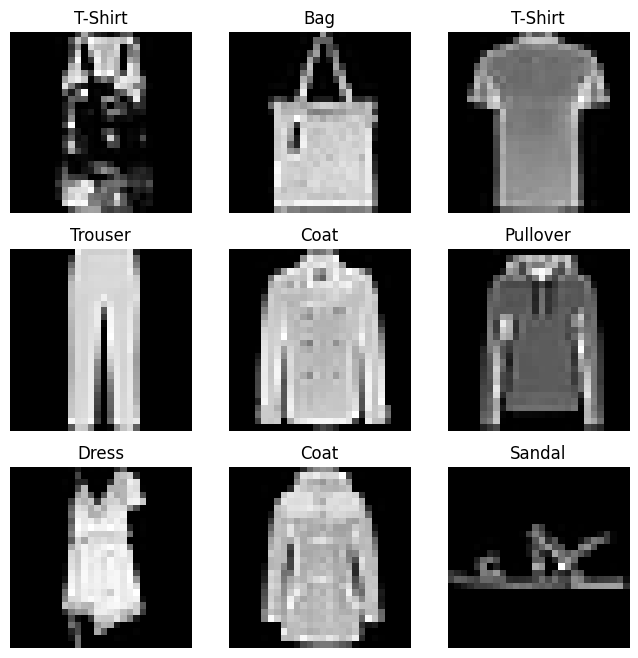

In [5]:
#visualizing the dataset 
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, row = 3,3
for i in range(1, cols * row + 1):
    sample_idx = torch.randint(len(train_dt), size=(1,)).item()
    img, label = train_dt[sample_idx]
    figure.add_subplot(row, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### CREATING CUSTOM DATASET FOR FILES

In [6]:
import os
import pandas as pd
from torchvision.io import read_image 

In [7]:
class CD(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [8]:
def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.erad_csv(annotation_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [10]:
def __getitem__(self, idx): #this f(x) loads and retuns the sameple of dtset of given idx
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

### PREPARING DT FOR TRAIN WITH DTLOADERS

In [12]:
from torch.utils.data import DataLoader

train_dt = DataLoader(train_dt, batch_size=64, shuffle=True)
test_dt = DataLoader(test_dt, batch_size=64, shuffle=True)

Feature bath shape: torch.Size([64, 1, 28, 28])
labels bath shape: torch.Size([64])


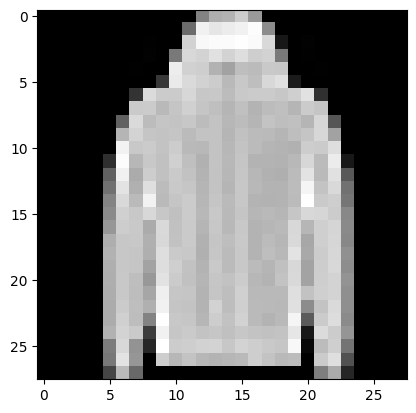

Label: 4


In [14]:
train_f, train_l = next(iter(train_dt))
print(f'Feature bath shape: {train_f.size()}')
print(f'labels bath shape: {train_l.size()}')
img = train_f[0].squeeze()
label = train_l[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

### TRANSFORM (data)

In [1]:
import torch
from torchvision import datasets 
from torchvision.transforms import ToTensor, Lambda

In [2]:
ds = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform=Lambda(lambda Y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### BUILD NN

In [16]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)
print(f'Using {device} device')

Using cuda device


### DEFINING CLASS

In [18]:
class NN(nn.Module):
    def __init__(self):
        super().__init__() # super is a way to call the constructor
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
model = NN().to(device)
print(model)

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_p = nn.Softmax(dim=1)(logits)
y_pred = pred_p.argmax(1)
print(f'predicted class: {y_pred}')

predicted class: tensor([7], device='cuda:0')


In [21]:
# model layers
ip_img = torch.rand(3, 28, 28)
print(ip_img.size())

torch.Size([3, 28, 28])


In [22]:
flatten = nn.Flatten()
flat_img = flatten(ip_img)
print(flat_img)

tensor([[0.1896, 0.1623, 0.4136,  ..., 0.1996, 0.0297, 0.4836],
        [0.4199, 0.7787, 0.5152,  ..., 0.1099, 0.6955, 0.0359],
        [0.4280, 0.6465, 0.5502,  ..., 0.2341, 0.0727, 0.3331]])


In [26]:
#nn.Linear used to apply linear transformation on i/p using stored wts and bias
ly1 = nn.Linear(in_features=28*28, out_features=20)
hid2 = ly1(flat_img)
print(hid1.size())

AttributeError: 'ReLU' object has no attribute 'size'

In [24]:
# activation function 
print(f'Before rleu {hid1}\n\n')
hid1 = nn.ReLU(hid1)
print(f'After relu {hid1}')

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [8]:
!nvidia-smi

Thu Dec  5 20:29:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX330         WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P0             N/A / ERR!  |       0MiB /   2048MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch  

In [10]:
x = torch.ones(2,2, dtype=torch.int)
print(x.dtype)

torch.int32


In [11]:
y = torch.tensor([2.5, 0.1])
print(y)

tensor([2.5000, 0.1000])


In [12]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
z = torch.add(x,y)
print(y)

tensor([[0.8155, 0.5194],
        [0.3397, 0.3823]])
tensor([[0.0811, 0.4409],
        [0.8249, 0.2792]])
tensor([[0.0811, 0.4409],
        [0.8249, 0.2792]])


In [13]:
#inplace operation
y.add_(x)
print(y)

tensor([[0.8966, 0.9604],
        [1.1646, 0.6615]])


In [4]:
x = torch.rand(5,3)
print(x)
print(x[1,1].item()) # item gets the actual value of the tensor

tensor([[0.0333, 0.8546, 0.5295],
        [0.9845, 0.3688, 0.5513],
        [0.0127, 0.9688, 0.0455],
        [0.9474, 0.9375, 0.2002],
        [0.1314, 0.2703, 0.5844]])
0.3687746524810791


In [7]:
# reshape
x = torch.rand(4,4)
print(x)
y = x.view(16)
y = x.view(-1, 8)
print(y.size())

tensor([[0.6572, 0.7956, 0.6832, 0.9531],
        [0.5601, 0.1127, 0.8137, 0.5487],
        [0.8238, 0.1481, 0.9735, 0.3790],
        [0.4216, 0.9101, 0.1386, 0.9125]])
torch.Size([2, 8])


In [12]:
# numpy to torch
import numpy as np
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)
a.add_(1)
print(a)
print(b)
a = n

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


NameError: name 'n' is not defined

In [13]:
# numpy to torch 
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [16]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    x = torch.ones(5, device=device)
    y = torch.ones(5)
    y = y.to(device)
    z = x + y
    z = z.to('cpu')
print(z)

tensor([2., 2., 2., 2., 2.])


In [18]:
x = torch.ones(5, requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


### GRADIENT CALCULATION WITH AUTOGRAD

In [1]:
import torch 

In [2]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.5679,  0.1135, -1.4262], requires_grad=True)


In [3]:
y =  x + 2
print(y)
z = y * y * 2
z = z.mean()
print(z)

v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward() # dz/dx, for this we require requires_grad = True
print(x.grad)
print(v)

tensor([2.5679, 2.1135, 0.5738], grad_fn=<AddBackward0>)
tensor(7.5935, grad_fn=<MeanBackward0>)
tensor([3.4238, 2.8181, 0.7651])
tensor([0.1000, 1.0000, 0.0010])


In [4]:
# prevent pytorch from history of tracking the route 
x.requires_grad_(False)
print(x)
y = x.detach()
print(y)
with torch.no_grad():
    y = x + 2
    print(y)

tensor([ 0.5679,  0.1135, -1.4262])
tensor([ 0.5679,  0.1135, -1.4262])
tensor([2.5679, 2.1135, 0.5738])


In [10]:
wts = torch.ones(4, requires_grad=True)
for epoch in range(10): # no of iteration 
    model_otp = (wts * 3).sum() 
    model_otp.backward()
    print(wts.grad)
    wts.grad.zero_() # in order to make the wts 0 after every iteration

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [15]:
import torch
ets = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD([ets], lr = 0.001)
optimizer.step()
optimizer.zero_grad()

### BACKPROPAGATION TECHNIQUES

In [1]:
import torch

In [3]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)
#forward
y_hat = w * x
loss = (y_hat - y) ** 2
print(loss)

#bckward

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### GRADIENT DESCENT WITH AUGTOGRAD AND BKPROPAGATION

In [7]:
import torch 
import numpy as np
from numpy import random

In [12]:
x = np.array([1,2,3,4,5], dtype = np.float32)
y = np.array([6,7,8,9,10], dtype = np.float32)
w = 0.0

In [17]:
# model prediction
def forward(x):
    return w * x
#loss = mSE
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

#gradient 
#MSE = 1/N w*x(w*x -y) ** 2
#dj/dw = 1/N 2x (w*x -y)
def gradient(x,y, y_pred):
    return np.dot(2*x, y_pred-y).mean()
print(f'prediction before training: f(5) = {forward(5):.3f}')

#Training

learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # pred = forward pass
    y_pred = forward(x)
    #loss
    l = loss(y, y_pred)
    #gradients
    dw = gradient(x,y,y_pred)
    #update the weigths 
    w -= learning_rate * dw
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'prediction after training: f(5) = {forward(5):.3f}')
  

prediction before training: f(5) = 13.000
epoch 1: w = 2.340, loss = 5.15999985
epoch 2: w = 2.366, loss = 4.55160046
epoch 3: w = 2.363, loss = 4.54551601
epoch 4: w = 2.364, loss = 4.54545498
epoch 5: w = 2.364, loss = 4.54545450
epoch 6: w = 2.364, loss = 4.54545450
epoch 7: w = 2.364, loss = 4.54545450
epoch 8: w = 2.364, loss = 4.54545450
epoch 9: w = 2.364, loss = 4.54545450
epoch 10: w = 2.364, loss = 4.54545450
prediction after training: f(5) = 11.818


In [25]:
import torch

In [27]:
x = torch.tensor([1,2,3,4,5], dtype = torch.float32)
y = torch.tensor([2,3,4,5,6], dtype = torch.float32)
w = torch.tensor(0.0, dtype = torch.float32, requires_grad=True)

In [31]:
# model prediction
def forward(x):
    return w * x
#loss = mSE
def loss(y, y_pred):
    return ((y_pred-y)**2).mean()

#gradient 
#MSE = 1/N w*x(w*x -y) ** 2
#dj/dw = 1/N 2x (w*x -y)
def gradient(x,y, y_pred):
    return np.dot(2*x, y_pred-y).mean()
print(f'prediction before training: f(5) = {forward(5):.3f}')

#Training

learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # pred = forward pass
    y_pred = forward(x)
    #loss
    l = loss(y, y_pred)
    #gradients
    l.backward()
    #update the weigths 
    with torch.no_grad():
        w -= learning_rate * w.grad
    #zero gradients
    w.grad.zero_()
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'prediction after training: f(5) = {forward(5):.3f}')
  

prediction before training: f(5) = 6.364
epoch 1: w = 1.273, loss = 0.18181820
epoch 2: w = 1.273, loss = 0.18181820
epoch 3: w = 1.273, loss = 0.18181820
epoch 4: w = 1.273, loss = 0.18181820
epoch 5: w = 1.273, loss = 0.18181820
epoch 6: w = 1.273, loss = 0.18181820
epoch 7: w = 1.273, loss = 0.18181820
epoch 8: w = 1.273, loss = 0.18181820
epoch 9: w = 1.273, loss = 0.18181820
epoch 10: w = 1.273, loss = 0.18181820
prediction after training: f(5) = 6.364


In [32]:
import torch
import torch.nn as nn

In [33]:
# model prediction
def forward(x):
    return w * x

#gradient 
#MSE = 1/N w*x(w*x -y) ** 2
#dj/dw = 1/N 2x (w*x -y)
def gradient(x,y, y_pred):
    return np.dot(2*x, y_pred-y).mean()
print(f'prediction before training: f(5) = {forward(5):.3f}')

#Training

learning_rate = 0.01
n_iters = 10

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
    # pred = forward pass
    y_pred = forward(x)
    #loss
    l = loss(y, y_pred)
    #gradients
    l.backward()
    #update wts
    optimizer.step()
    #zero gradients
    optimizer.zero_grad()
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'prediction after training: f(5) = {forward(5):.3f}')
  

prediction before training: f(5) = 6.364
epoch 1: w = 1.273, loss = 0.18181820
epoch 2: w = 1.273, loss = 0.18181820
epoch 3: w = 1.273, loss = 0.18181820
epoch 4: w = 1.273, loss = 0.18181820
epoch 5: w = 1.273, loss = 0.18181820
epoch 6: w = 1.273, loss = 0.18181820
epoch 7: w = 1.273, loss = 0.18181820
epoch 8: w = 1.273, loss = 0.18181820
epoch 9: w = 1.273, loss = 0.18181820
epoch 10: w = 1.273, loss = 0.18181820
prediction after training: f(5) = 6.364


In [37]:
x = torch.tensor([[1],[2],[3],[4],[5]], dtype = torch.float32)
y = torch.tensor([[2],[3],[4],[5],[6]], dtype = torch.float32)
n_samples, n_features = x.shape
print(n_samples, n_features)
x_test = torch.tensor([5], dtype=torch.float32)

5 1


In [40]:
in_size = n_features
op_size = n_features
model = nn.Linear(in_size, op_size)

'''class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define the layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(in_size, op_size)'''
print(f'prediction before training: f(5) = {model(x_test).item():.3f}')

#Training

learning_rate = 0.01
n_iters = 10

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
    # pred = forward pass
    y_pred = model(x)
    #loss
    l = loss(y, y_pred)
    #gradients
    l.backward()
    #update wts
    optimizer.step()
    #zero gradients
    optimizer.zero_grad()
    if epoch % 1 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
print(f'prediction after training: f(5) = {model(x_test).item():.3f}')
  

prediction before training: f(5) = 1.610
epoch 1: w = 0.507, loss = 9.91241264
epoch 2: w = 0.665, loss = 5.80732441
epoch 3: w = 0.785, loss = 3.41487384
epoch 4: w = 0.877, loss = 2.02046561
epoch 5: w = 0.947, loss = 1.20766795
epoch 6: w = 1.001, loss = 0.73380536
epoch 7: w = 1.041, loss = 0.45745888
epoch 8: w = 1.072, loss = 0.29621658
epoch 9: w = 1.095, loss = 0.20205255
epoch 10: w = 1.113, loss = 0.14697962
prediction after training: f(5) = 5.927


# LINEAR REGRESSION 

In [2]:
import torch 
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [3]:
# prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

epochs: 10, loss = 4403.1123
epochs: 20, loss = 3286.8335
epochs: 30, loss = 2478.4695
epochs: 40, loss = 1892.4967
epochs: 50, loss = 1467.3370
epochs: 60, loss = 1158.5925
epochs: 70, loss = 934.2095
epochs: 80, loss = 771.0184
epochs: 90, loss = 652.2516
epochs: 100, loss = 565.7629


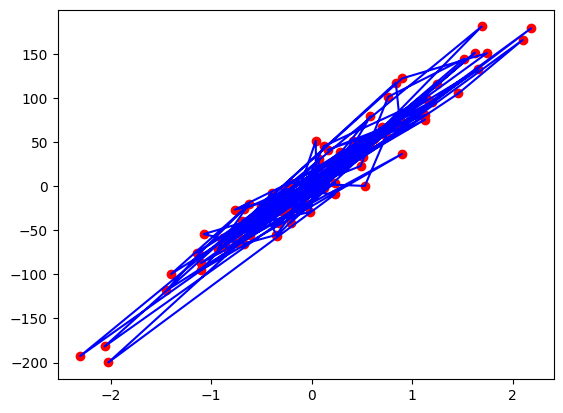

In [7]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = x.shape

# model
ip_size = n_features
op_size = 1
model = nn.Linear(ip_size, op_size)

#loss and optimizer
learning_rate = 0.01
creation = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#training loop

num_epochs = 100
for epoch in range(num_epochs):
    #forwrd pass
    y_pred = model(x)
    loss = creation(y_pred, y)

    #backward pass
    loss.backward()

    #update weights
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f'epochs: {epoch+1}, loss = {loss.item():.4f}')

#plot 
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, y_numpy, 'b')
plt.show()
    